In [1]:
import nbsetup
import numpy as np
import seaborn as sns
import scipy as sp
import pandas as pd

In [2]:
from models.load import load_sparc
from models.sparc.result import Result
from models.sparc.mcmc import mcmc
from models.sparc.analysis import Analysis

<AxesSubplot:title={'center':'Everything'}, xlabel='Log of Baryonic g', ylabel='Log of Observed g'>

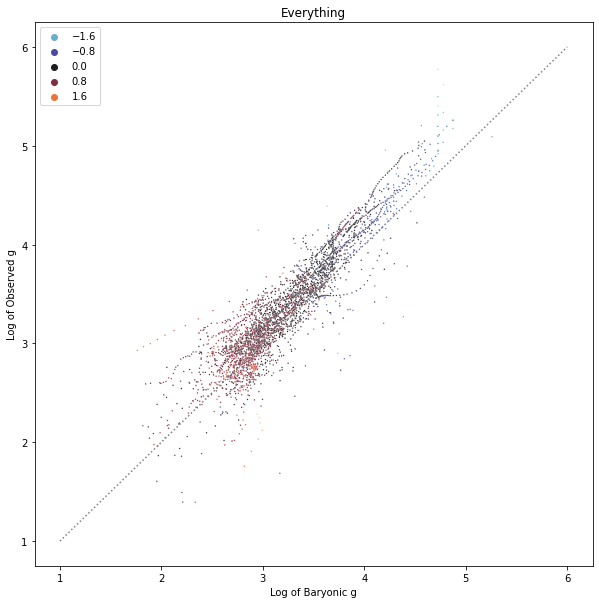

In [4]:
simulations = load_sparc()
inputs = Result(simulations)
inputs.plot_rar()

In [5]:
aa = Analysis(mcmc(inputs.dataframe), name='Experiment')
outputs = aa.Result(simulations=simulations, fast=True)

(0.01635202907895742, 0.10840809838380089)

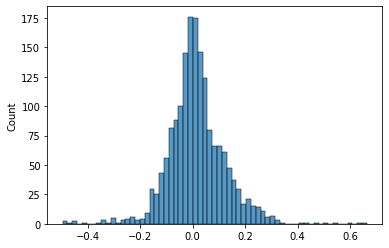

In [6]:
g, data = outputs.residual_hist()
data.mean(), data.std()

<AxesSubplot:xlabel='Galaxy in order of SPARC reference parameter value', ylabel='Mass/Luminosity adjustment'>

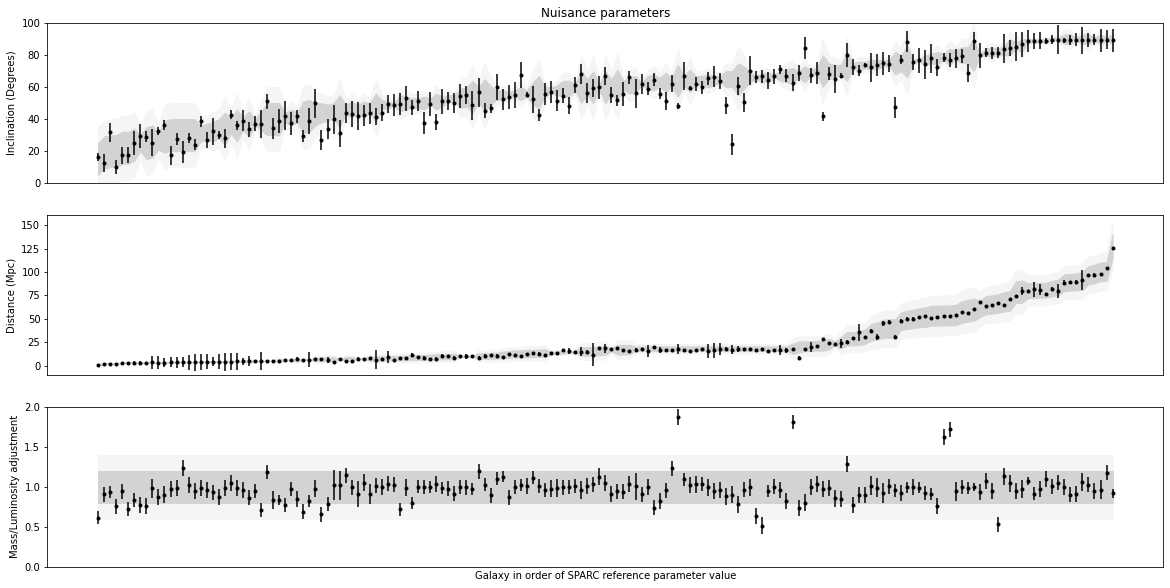

In [7]:
aa.plot_nuissance()

<AxesSubplot:title={'center':'Everything'}, xlabel='Log of Baryonic g', ylabel='Log of Observed g'>

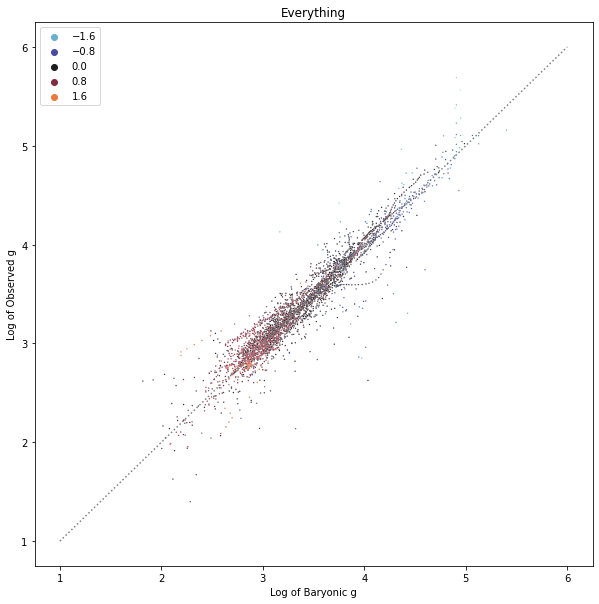

In [8]:
outputs.plot_rar()

[(2.5, 4.5), Text(0.5, 0, 'Log of Predicted g'), Text(0, 0.5, 'Residuals')]

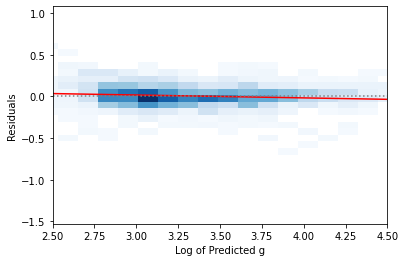

In [9]:
g = outputs.residual()
g.set(xlim=(2.5,4.5), xlabel="Log of Predicted g", ylabel="Residuals")

In [10]:
outputs.residual(plot=False).slope

-0.034496854339683976